In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [4]:
data_load = load_breast_cancer()
data= pd.DataFrame(data_load['data'],columns=data_load['feature_names'])
data['target']=data_load['target']

In [5]:
data= pd.DataFrame(data_load['data'],columns=data_load['feature_names'])
data['target']=data_load['target']

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [7]:
drop_var = ['texture error','mean texture','mean fractal dimension','mean symmetry','mean smoothness','symmetry error','fractal dimension error','concavity error','concave points error','smoothness error','worst smoothness','worst symmetry','worst fractal dimension','worst compactness','compactness error','mean compactness','perimeter error','radius error','area error','mean radius','mean area','worst texture']
data1 = data.drop(columns=drop_var)

In [8]:
X= data1.drop(columns=['target'])
y = data1['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [10]:
clf = RandomForestClassifier(max_depth= 6,random_state=42,class_weight='balanced',min_samples_leaf=0.04,max_samples=0.66,min_impurity_decrease=.05)

clf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, max_samples=0.66,
                       min_impurity_decrease=0.05, min_samples_leaf=0.04,
                       random_state=42)

In [11]:
clf.feature_importances_

array([0.0176134 , 0.06027546, 0.2553986 , 0.12156159, 0.18394462,
       0.18938441, 0.01546731, 0.15635461])

In [12]:
pd.DataFrame(data=clf.feature_importances_,index=X_test.columns,columns =['Feature_importance']).sort_values('Feature_importance',ascending=False)

,Feature_importance
mean concave points,0.255399
worst area,0.189384
worst perimeter,0.183945
worst concave points,0.156355
worst radius,0.121562
mean concavity,0.060275
mean perimeter,0.017613
worst concavity,0.015467


In [13]:
print(classification_report(clf.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       179
           1       0.94      0.97      0.96       276

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.94       455
weighted avg       0.95      0.95      0.95       455



In [14]:
print(classification_report(clf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.96      0.97      0.96        70

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [15]:
import shap

C:\Users\AyushJain\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
explainer =shap.TreeExplainer(clf)
explanation = explainer.shap_values(X_test,y=y_test)
explanation_train = explainer.shap_values(X_train,y=y_train)

In [17]:
X_test[y_test==0].index

Index([ 70, 131, 567, 369,  29, 167, 329,  83, 535,  73, 393,  72,  10,   6,
       353, 264,  30,  82,  39,   2, 564, 118,  78, 196,  11, 177, 255, 132,
        86, 250, 274, 257,   9, 468, 565, 203, 441, 182,  77, 408, 503,  75,
       265],
      dtype='int64')

In [18]:
instance=X_test.loc[[204]]
shap_values = explainer.shap_values(instance)

In [19]:
shap_values[0,:,0]

array([-0.00664926, -0.01587293, -0.11260912, -0.05223063, -0.08045682,
       -0.08312886,  0.00409749, -0.06201174])

In [20]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0,:,0], instance)

In [21]:
shap_values[0,:,0]

array([-0.00664926, -0.01587293, -0.11260912, -0.05223063, -0.08045682,
       -0.08312886,  0.00409749, -0.06201174])

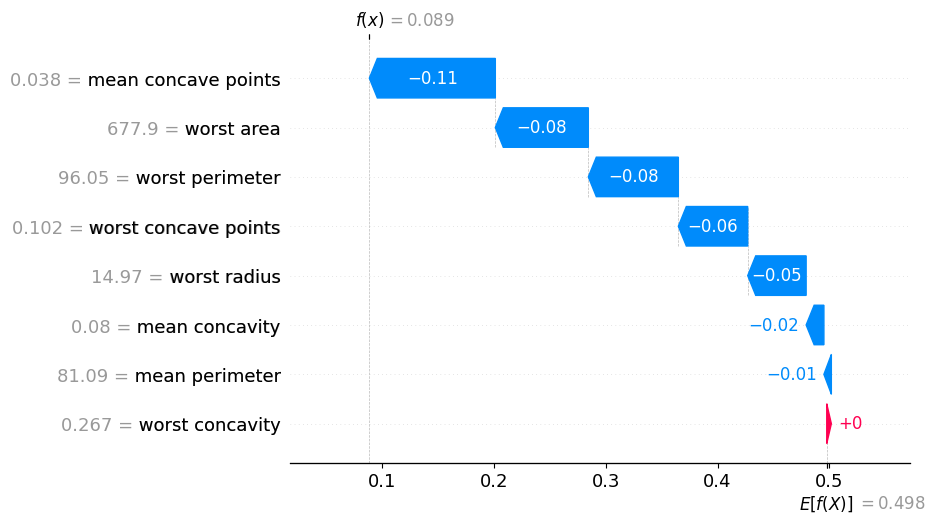

In [22]:

shap.waterfall_plot(shap.Explanation(values=shap_values[0,:,0],base_values=explainer.expected_value[0],data=np.array(X_test.loc[204]),feature_names=X_test.columns))

In [23]:
shap.plots.force(explainer.expected_value[0],explanation[:,:,0],feature_names=X_test.columns)

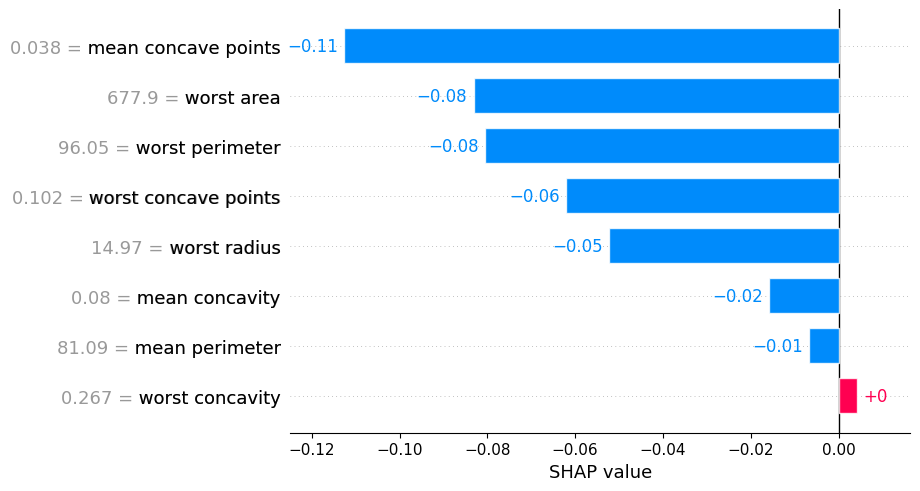

In [24]:
shap.plots.bar(shap.Explanation(values=shap_values[0,:,0],base_values=explainer.expected_value[0],data=np.array(X_test.loc[204]),feature_names=X_test.columns))

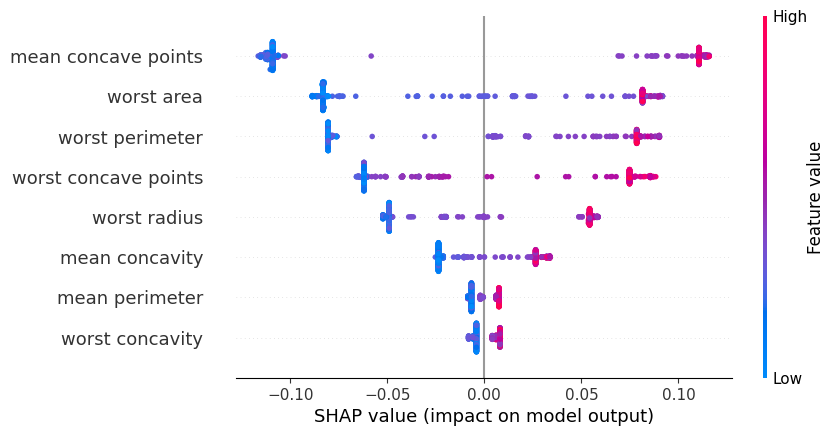

In [25]:
shap.plots.beeswarm(shap.Explanation(values=explanation_train[:,:,0],base_values=explainer.expected_value[0],data=X_train,feature_names=X_train.columns))

In [26]:
X_train.columns

Index(['mean perimeter', 'mean concavity', 'mean concave points',
       'worst radius', 'worst perimeter', 'worst area', 'worst concavity',
       'worst concave points'],
      dtype='object')

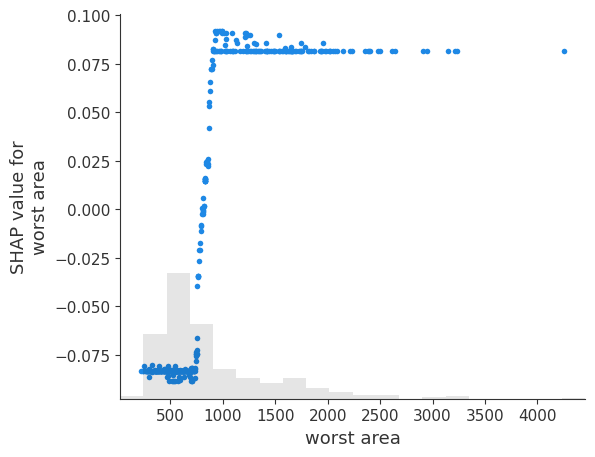

In [27]:
a=shap.Explanation(values=explanation_train[:,5,0],base_values=explainer.expected_value[0],data=np.array(X_train['worst area']),feature_names='worst area')
shap.plots.scatter(a)

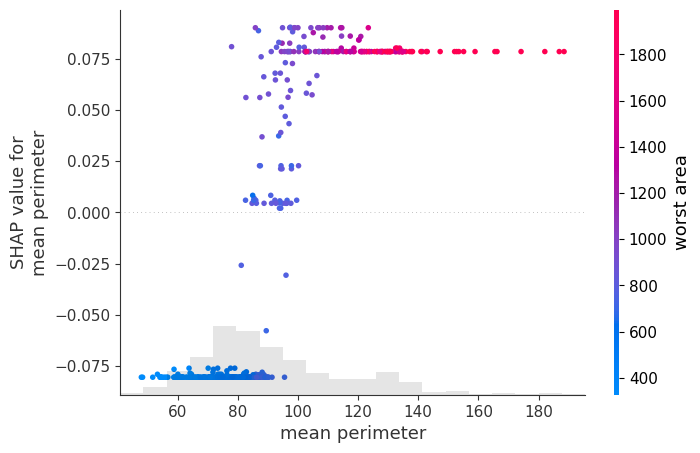

In [28]:
a=shap.Explanation(values=explanation_train[:,4,0],base_values=explainer.expected_value[0],data=np.array(X_train['mean perimeter']),feature_names='mean perimeter')
b=shap.Explanation(values=explanation_train[:,2,0],base_values=explainer.expected_value[0],data=np.array(X_train['worst area']),feature_names='worst area')
shap.plots.scatter(a,color=b)

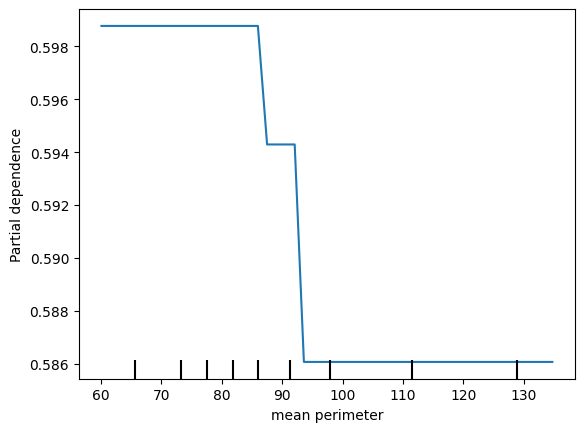

In [31]:
from sklearn.inspection import PartialDependenceDisplay

feature_idx = 0

PartialDependenceDisplay.from_estimator(
    clf,X_train,features = [feature_idx],kind='individual',grid_resolution = 50
)